<a href="https://colab.research.google.com/github/Noahbisht0/Tensorflow2-keras/blob/main/Tensorflow2_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras 

In [ ]:
def plot_series(time,series,format="-",start=0,end=None,label=None):
  plt.plot(time[start:end],series[start:end],format,label = label)
  plt.xlabel("Time")
  plt.ylabel("Values")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

In [ ]:
def trend(time,slope):
  return time * slope

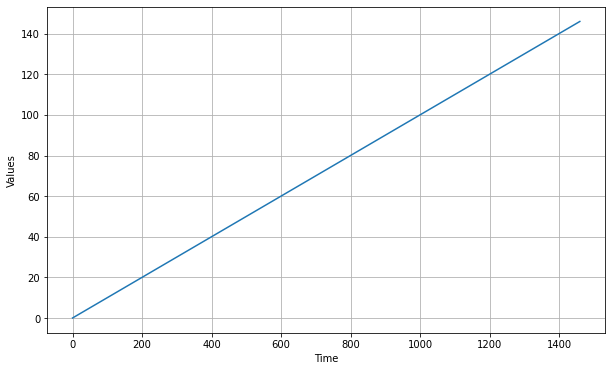

In [ ]:
time = np.arange(4*365 + 1)
baseline = 10
series = trend(time,0.1)
plt.figure(figsize=(10,6))
plot_series(time,series)
plt.show()

In [ ]:
def seasonal_pattern(season_time):
  return np.where(season_time < 0.4,np.cos(season_time * 2 * np.pi),1 / np.exp(3 * season_time))
def seasonality(time,period,amplitude=1,phase=0):
  season_time = ((time + phase) % period) / period
  return amplitude * seasonal_pattern(season_time)

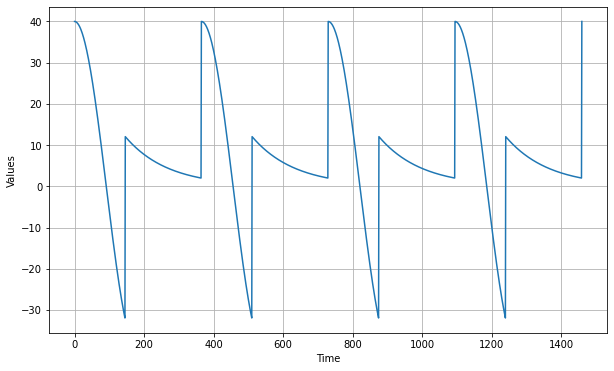

In [ ]:
baseline = 10 
amplitude = 40
series= seasonality(time,period=365,amplitude=amplitude)
plt.figure(figsize=(10,6))
plot_series(time,series)
plt.show()

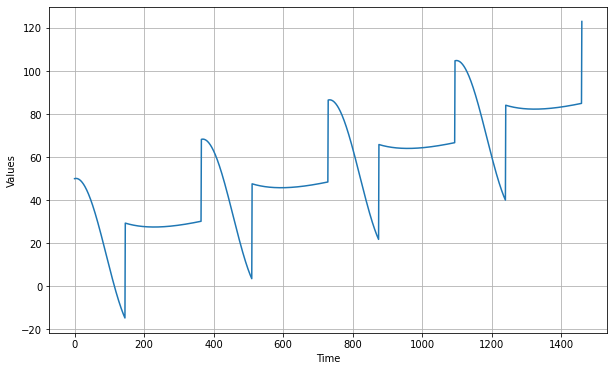

In [ ]:
slope = 0.05
series = baseline + trend(time,slope) + seasonality(time,period=365,amplitude=amplitude)
plt.figure(figsize=(10,6))
plot_series(time,series)
plt.show()

In [ ]:
def white_noise(time,noise_level=1,seed=None):
  rnd = np.random.RandomState(seed)
  return rnd.randn(len(time)) * noise_level


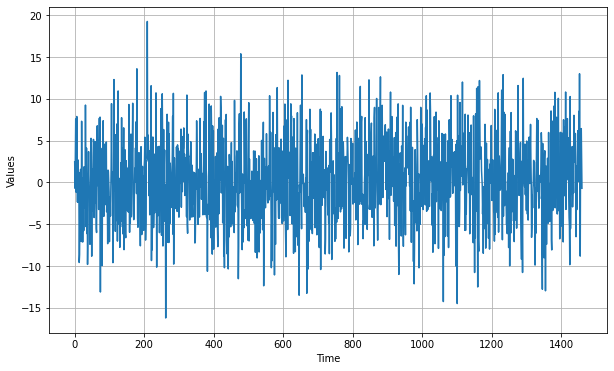

In [ ]:
noise_level = 5
noise = white_noise(time,noise_level=noise_level,seed=42)
plt.figure(figsize=(10,6))
plot_series(time,noise)
plt.show()

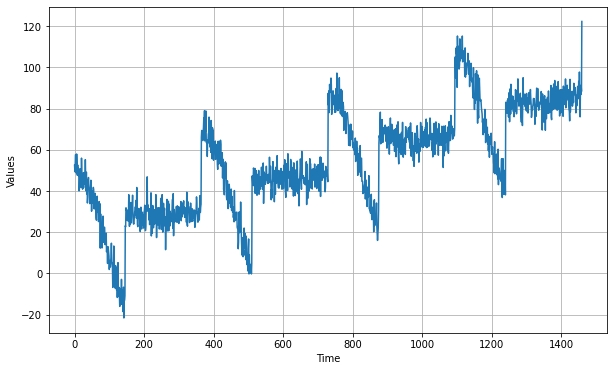

In [ ]:
series += noise
plt.figure(figsize=(10,6))
plot_series(time,series)
plt.show()

In [ ]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [ ]:
def autocorrelation(time,amplitude,seed=None):
  rnd = np.random.RandomState(seed)
  phi1 = 0.5
  phi2 = -0.1
  ar = rnd.randn(len(time)+50)
  ar[:50] = 100
  for step in range(50,len(time)+50):
    ar[step] += phi1 * ar[step - 50]
    ar[step] += phi2 * ar[step - 33]
  return ar[50:] * amplitude


In [ ]:
def autocorrelation(time,amplitude,seed=None):
  rnd = np.random.RandomState(seed)
  phi = 0.8
  ar = rnd.randn(len(time)+1)
  for step in range(1,len(time)+1):
    ar[step] += phi * ar[step -1]
  return ar[1:] * amplitude

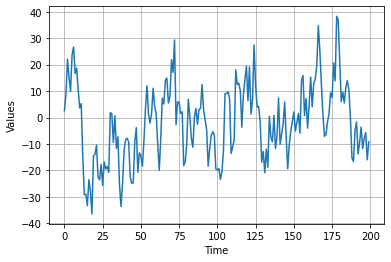

In [ ]:
series = autocorrelation(time,10,seed=42)
plot_series(time[:200],series[:200])
plt.show()

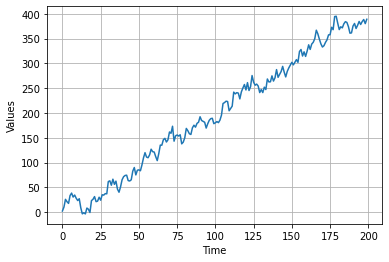

In [ ]:
series = autocorrelation(time,10,seed=42) + trend(time,2)
plot_series(time[:200],series[:200])
plt.show()

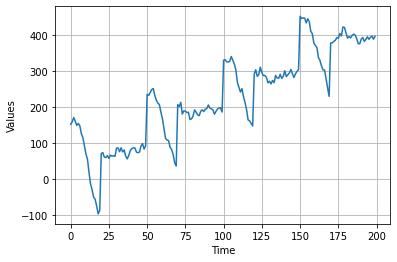

In [ ]:
series = autocorrelation(time,10,seed=42) + trend(time,2) + seasonality(time,period=50,amplitude=150)
plot_series(time[:200],series[:200])
plt.show()

In [ ]:
def impulses(time,num_impulses,amplitude=1,seed=None):
  rnd = np.random.RandomState(seed)
  impulse_indices = rnd.randint(len(time),size=10)
  series = np.zeros(len(time))
  for index in impulse_indices:
    series[index] += rnd.rand() * amplitude
  return series

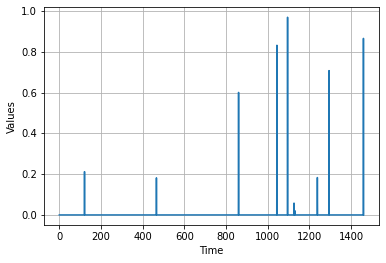

In [ ]:
series = impulses(time,10,seed=42)
plot_series(time,series)
plt.show()

In [ ]:
def autocorrelation(source, φs):
    ar = source.copy()
    max_lag = len(φs)
    for step, value in enumerate(source):
        for lag, φ in φs.items():
            if step - lag > 0:
              ar[step] += φ * ar[step - lag]
    return ar

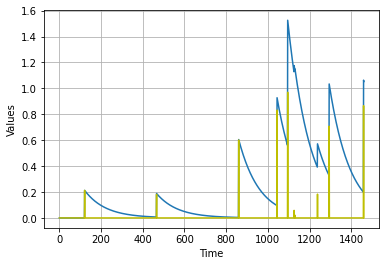

In [ ]:
signal = impulses(time, 10, seed=42)
series = autocorrelation(signal, {1: 0.99})
plot_series(time, series)
plt.plot(time, signal, "y-")
plt.show()

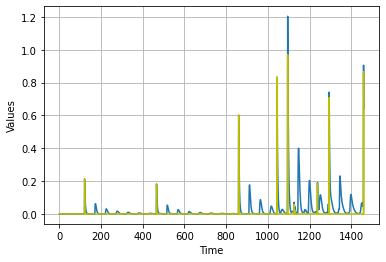

In [ ]:
signal = impulses(time, 10, seed=42)
series = autocorrelation(signal, {1: 0.70, 50: 0.2})
plot_series(time, series)
plt.plot(time, signal, "y-")
plt.show()

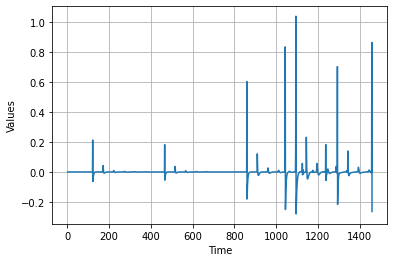

In [ ]:
series_diff1 = series[1:] - series[:-1]
plot_series(time[1:], series_diff1)

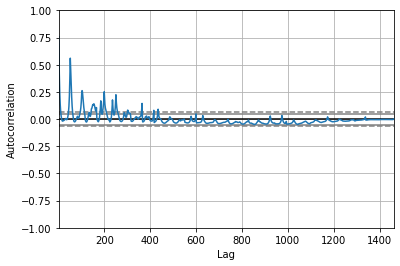

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)